In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics, preprocessing, tree
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import xgboost as xgb

In [119]:
df=pd.read_csv("drug.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [120]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [122]:
df.shape

(200, 6)

In [123]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [124]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [125]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [126]:
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

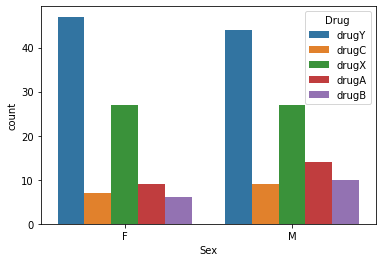

In [127]:
sns.countplot(x="Sex", hue="Drug", data=df)

<AxesSubplot:xlabel='BP', ylabel='count'>

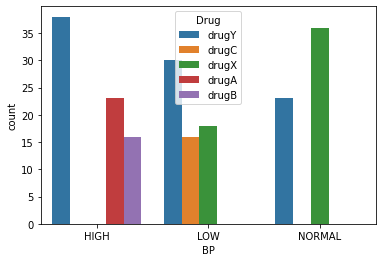

In [128]:
sns.countplot(x="BP", hue="Drug", data=df)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

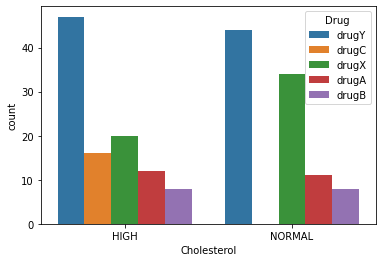

In [129]:
sns.countplot(x="Cholesterol", hue="Drug", data=df)

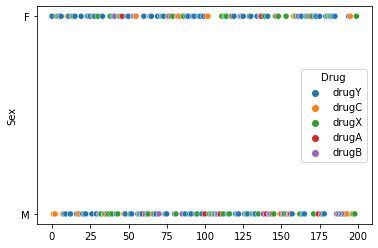

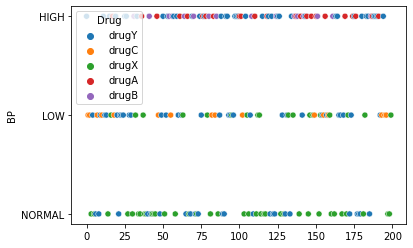

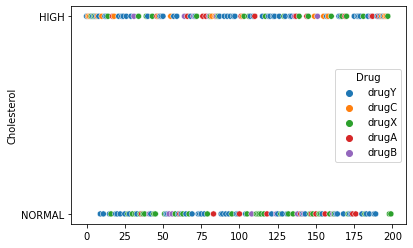

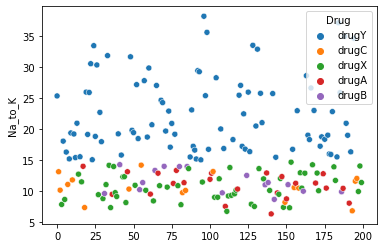

In [130]:
for column in df.columns[1:-1]:
    sns.scatterplot(data=df, x=df.index,y=column,hue="Drug")
    plt.show()

In [131]:
le=preprocessing.LabelEncoder()

In [132]:
df["Sex"]=le.fit(['F', 'M']).transform(df["Sex"])
df["BP"]=le.fit(['HIGH', 'LOW', 'NORMAL']).transform(df["BP"])
df["Cholesterol"]=le.fit(['HIGH', 'NORMAL']).transform(df["Cholesterol"])

In [133]:
df.groupby("Drug").agg(["min","max","std","mean"])

Age                           Sex                          BP      \
      min max        std       mean min max       std      mean min max   
Drug                                                                      
drugA  19  50   9.696786  35.869565   0   1  0.499011  0.608696   0   0   
drugB  51  74   7.127412  62.500000   0   1  0.500000  0.625000   0   0   
drugC  16  72  16.725230  42.500000   0   1  0.512348  0.562500   1   1   
drugX  15  74  16.435685  44.018519   0   1  0.504695  0.500000   1   2   
drugY  15  74  17.031731  43.747253   0   1  0.502497  0.483516   0   2   

                          Cholesterol                         Na_to_K          \
            std      mean         min max       std      mean     min     max   
Drug                                                                            
drugA  0.000000  0.000000           0   1  0.510754  0.478261   6.269  13.972   
drugB  0.000000  0.000000           0   1  0.516398  0.500000   8.621  14.239   
drugC  0.000000  1.000000           0   0  0.000000  0.000000   6.769  14.160   
drugX  0.475831  1.666667           0   1  0.487438  0.629630   6.683  14.642   
drugY  0.806415  0.835165           0   1  0.502497  0.483516  15.015  38.247   

                            
            std       mean  
Drug                        
drugA  2.037642  10.918783  
drugB  1.869919  11.524375  
drugC  2.045009  10.633750  
drugX  2.198091  10.650556  
drugY  6.060195  22.374780

In [134]:
df["Drug"]=le.fit(['drugY', 'drugC', 'drugX', 'drugA', 'drugB']).transform(df["Drug"])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [135]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


<AxesSubplot:>

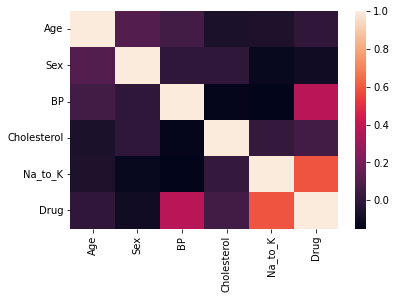

In [136]:
sns.heatmap(df.corr())

In [137]:
X=df[["Age","Sex","BP","Cholesterol","Na_to_K"]].values
y=df["Drug"].values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LOGISTIC REGRESSION

In [139]:
lr=LogisticRegression(C=0.1,max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000)

In [140]:
lr.coef_

array([[-6.76115042e-02,  6.63820970e-04, -7.00049259e-01,
        -1.44595935e-02, -2.87888373e-01],
       [ 1.03839981e-01, -4.04343735e-02, -5.94268315e-01,
         7.86548396e-02, -1.22067281e-01],
       [-1.83820596e-02,  1.30967420e-01,  1.25692846e-01,
        -3.69913455e-01, -2.82621792e-01],
       [-1.05520032e-02, -1.49094080e-01,  1.03598934e+00,
         3.37204437e-01, -2.81739339e-01],
       [-7.29441416e-03,  5.78972124e-02,  1.32635387e-01,
        -3.14862280e-02,  9.74316784e-01]])

In [141]:
lr.intercept_

array([  7.37333824,  -3.34290515,   4.45054648,   4.20388151,
       -12.68486108])

In [142]:
lr.score(X_train,y_train)

0.9

In [143]:
lr.score(X_test,y_test)

0.85

In [144]:
test_lr=lr.predict(X_test)
test_lr

array([3, 4, 3, 3, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 3, 4, 1, 1,
       3, 4, 4, 4, 3, 3, 4, 3, 4, 0, 4, 4, 0, 4, 1, 0, 4, 0, 3, 3, 3, 4,
       4, 3, 4, 4, 1, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [145]:
np.array(y_test)

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [146]:
metrics.r2_score(test_lr,y_test)

0.7590027700831026

In [147]:
metrics.accuracy_score(test_lr,y_test)

0.85

In [148]:
metrics.confusion_matrix(test_lr,y_test)

array([[ 7,  0,  1,  0,  0],
       [ 0,  3,  0,  2,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  4, 16,  0],
       [ 0,  0,  1,  0, 25]], dtype=int64)

# XGBOOST

In [149]:
xgb=xgb.XGBClassifier(objective="multi:softmax", num_class=5)

In [150]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [151]:
test_xgb=xgb.predict(X_test)
test_xgb

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 3, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [152]:
np.array(y_test)

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [153]:
xgb.score(X_train,y_train)

1.0

In [154]:
xgb.score(X_test,y_test)

0.9833333333333333

In [155]:
metrics.r2_score(test_xgb,y_test)

0.9905123339658444

In [156]:
metrics.accuracy_score(test_xgb,y_test)

0.9833333333333333

In [157]:
metrics.confusion_matrix(test_xgb,y_test)

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  1, 18,  0],
       [ 0,  0,  0,  0, 26]], dtype=int64)

# K NEAREST NEIGHBOR

In [158]:
n_neighbors=range(1,11)
weights=["uniform","distance"]
algorithm=["auto","ball_tree","kd_tree","brute"]
leaf=[20,30,40,50,60]
p=[1,2,3,4,5,6,7,8,9]

best_score=0

for i in n_neighbors:
    for j in weights:
        for k in algorithm:
            for l in leaf:
                for m in p:
                    knn=KNeighborsClassifier(n_neighbors=i, weights=j, algorithm=k, leaf_size=l, p=m)
                    knn.fit(X_train,y_train)
                    test_knn=knn.predict(X_test)
                    acc_sc=metrics.accuracy_score(y_test,test_knn)
                    
                    
                    if best_score<acc_sc:
                        best_score=acc_sc
                        ibest=i
                        jbest=j
                        kbest=k
                        lbest=l
                        mbest=m
                    
print("\nOptimization of Parameters:",
      "\nbest accuracy score:",best_score,
      "\nneighbour:",ibest,
      "\nweights:",jbest,
      "\nalgorithm:",kbest,
      "\nleaf:",lbest,
      "\np:",mbest,
      "\n-------------------------")


Optimization of Parameters: 
best accuracy score: 0.8166666666666667 
neighbour: 7 
weights: distance 
algorithm: auto 
leaf: 20 
p: 1 
-------------------------


In [159]:
knn_best=KNeighborsClassifier(n_neighbors=7, weights="distance", algorithm="auto", leaf_size=20, p=1)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=7, p=1, weights='distance')

In [160]:
pred=knn_best.predict(X_test)
pred

array([3, 4, 3, 1, 4, 4, 4, 2, 3, 3, 0, 3, 4, 0, 1, 4, 3, 3, 0, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 0, 3, 4, 0, 4, 1, 0, 4, 0, 0, 3, 3, 4,
       4, 1, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4])

In [161]:
np.array(y_test)

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [162]:
metrics.r2_score(pred,y_test)

0.6028169014084508

In [163]:
metrics.accuracy_score(pred,y_test)

0.8166666666666667

In [164]:
metrics.confusion_matrix(pred,y_test)

array([[ 5,  0,  2,  1,  0],
       [ 0,  2,  2,  1,  0],
       [ 0,  0,  1,  1,  0],
       [ 2,  1,  1, 15,  0],
       [ 0,  0,  0,  0, 26]], dtype=int64)

# DECISION TREE

In [165]:
model=DecisionTreeClassifier()

parameters={"criterion":["gini","entropi","log_loss"],
           "max_leaf_nodes":range(2,10),
           "max_depth":range(2,10),
           "min_samples_split":range(2,10),
           "min_samples_leaf":range(2,10)}
grid=GridSearchCV(model,param_grid=parameters,cv=10,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\Esat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
81920 fits failed out of a total of 122880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Esat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Esat\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Esat\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'entropi'

------------------------------

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [166]:
best_model=DecisionTreeClassifier(criterion="gini",max_depth=4,max_leaf_nodes=6,min_samples_leaf=2,min_samples_split=2)
best_model.fit(X_train,y_train)
pred=best_model.predict(X_test)
pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [167]:
np.array(y_test)

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [168]:
metrics.accuracy_score(pred,y_test)

1.0

In [169]:
metrics.confusion_matrix(pred,y_test)

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

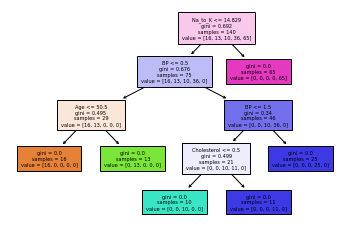

In [173]:
plot_tree(best_model,filled=True,fontsize=5,feature_names=df.columns[0:-1])
plt.show